In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:
data = pd.read_csv('data/base_llm_benchmark_eval.csv')
data.head()

,Model,Model Family,Model Size (B),Pretraining Data Size (T),FLOPs (1E21),MMLU,ARC-C,HellaSwag,Winograd,TruthfulQA,GSM8K,XWinograd,HumanEval
0,meta-llama/Llama-2-7b-hf,Llama-2,7.0,2.0,84.0,0.437961,0.530717,0.777435,0.740331,0.389802,0.144807,0.754881,0.128049
1,meta-llama/Llama-2-13b-hf,Llama-2,13.0,2.0,156.0,0.543378,0.581058,0.809699,0.766377,0.341724,0.228203,0.786798,0.182927
2,meta-llama/Llama-2-70b-hf,Llama-2,70.0,2.0,840.0,0.698321,0.673208,0.873332,0.837411,0.449235,0.540561,0.824453,0.298780
3,huggyllama/llama-7b,Llama,6.7,1.0,40.2,0.356933,0.509386,0.778132,0.714286,0.343279,0.080364,0.693204,0.128049
4,huggyllama/llama-13b,Llama,13.0,1.0,78.0,0.476106,0.561433,0.809201,0.762431,0.394789,0.075815,0.730362,0.158537


In [8]:
data.columns

Index(['Model', 'Model Family', 'Model Size (B)', 'Pretraining Data Size (T)',
       'FLOPs (1E21)', 'MMLU', 'ARC-C', 'HellaSwag', 'Winograd', 'TruthfulQA',
       'GSM8K', 'XWinograd', 'HumanEval'],
      dtype='object')

In [9]:
def logit(x, eps=.001):
    c = 0#np.min(x)
    x2 = (np.array(x)-c)/(1-c)
    return np.log((1+x2+eps)/(1-x2+eps))

In [10]:
benchs = ['MMLU', 'ARC-C', 'HellaSwag', 'Winograd',
          'TruthfulQA', 'GSM8K', 'XWinograd', 'HumanEval']

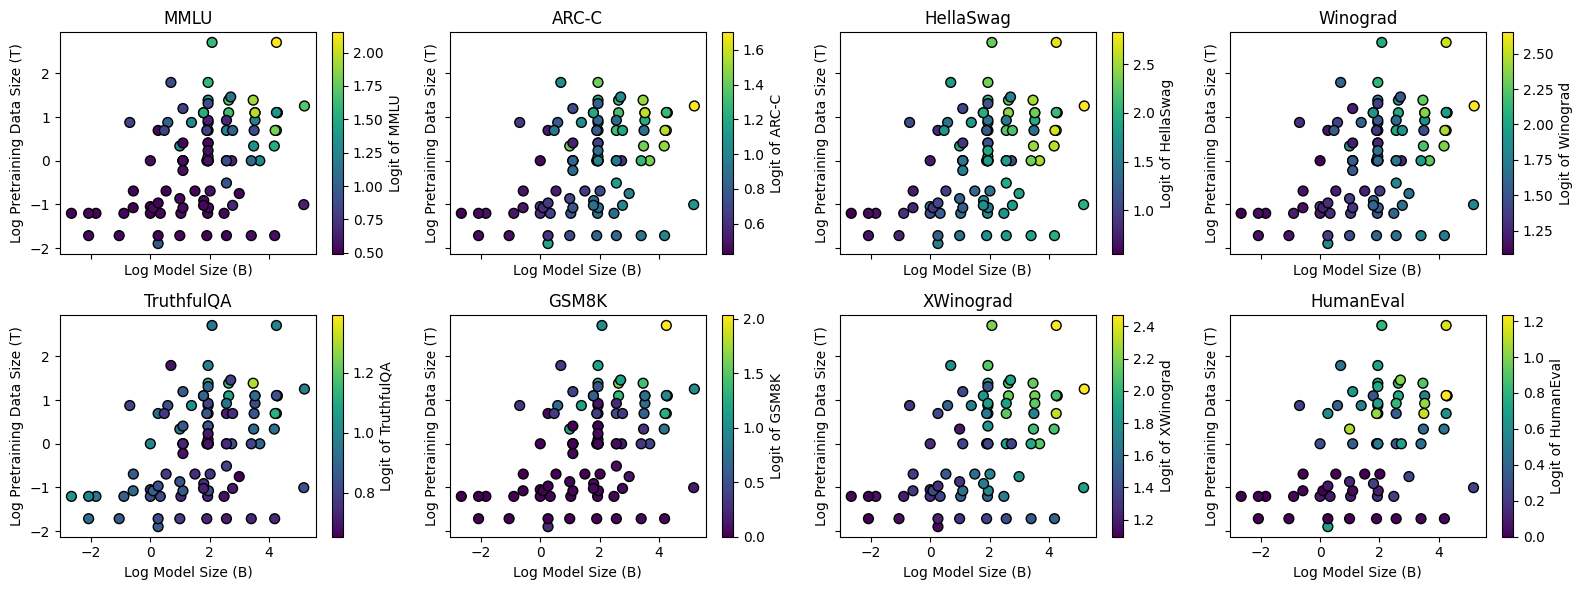

In [11]:
n_rows = 2
n_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6), sharex=True, sharey=True)

# Flatten the 2D array of axes to iterate easily
axes = axes.flatten()

for i, bench in enumerate(benchs):
    logS = np.log(data['Model Size (B)'])
    logT = np.log(data['Pretraining Data Size (T)'])
    y = logit(data[bench])  # If 'y' is already in logit form, remove the logit function

    # Create the scatter plot with color based on 'y'
    scatter = axes[i].scatter(logS, logT, c=y, cmap='viridis', s=50, edgecolor='k')  # Use cmap to choose color map
    
    # Add color bar to show the scale
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('Logit of ' + bench)
    
    # Add labels and title
    axes[i].set_xlabel('Log Model Size (B)')
    axes[i].set_ylabel('Log Pretraining Data Size (T)')
    axes[i].set_title(f'{bench}')

# Remove any unused subplots
for j in range(len(benchs), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


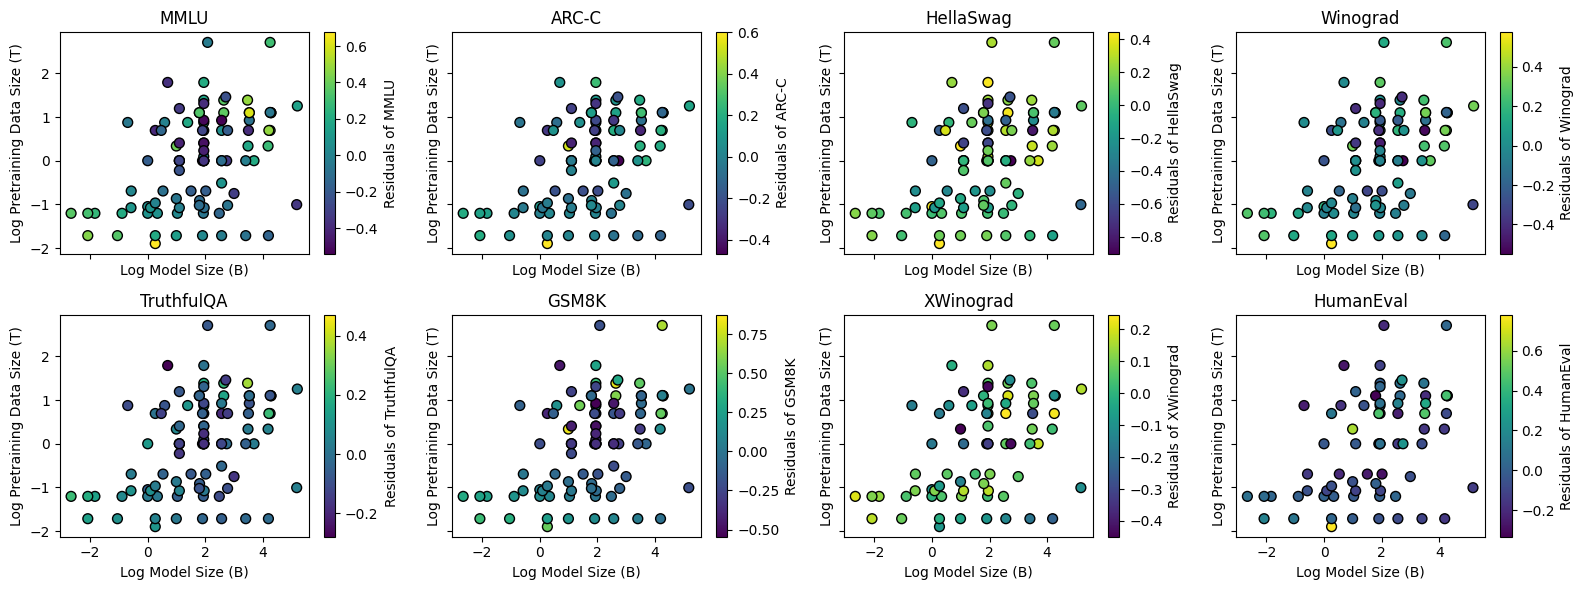

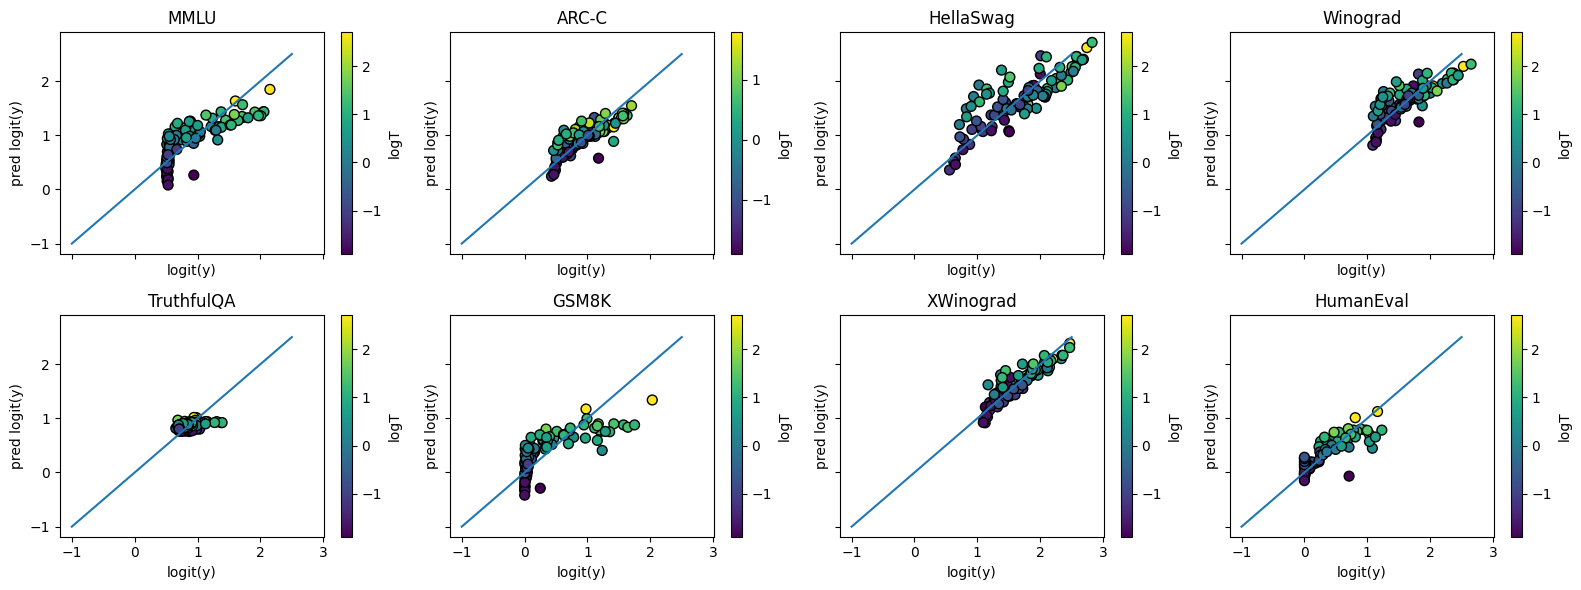

In [12]:
# Number of subplots needed
n_rows = 2
n_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6), sharex=True, sharey=True)

# Flatten the 2D array of axes to iterate easily
axes = axes.flatten()

for i, bench in enumerate(benchs):
    logS = np.log(data['Model Size (B)'])
    logT = np.log(data['Pretraining Data Size (T)'])
    y = logit(data[bench])  # If 'y' is already in logit form, remove the logit function
    select = (~np.isnan(logS))*(~np.isnan(logT))*(~np.isnan(y))
    logS = logS[select]
    logT = logT[select]
    y = y[select]
    
    # Fit linear regression model
    X = np.column_stack([logS, logT])
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict and compute residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Create the scatter plot of residuals
    scatter = axes[i].scatter(logS, logT, c=residuals, cmap='viridis', s=50, edgecolor='k')

    # Add color bar to show the scale
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('Residuals of ' + bench)

    # Add labels and title
    axes[i].set_xlabel('Log Model Size (B)')
    axes[i].set_ylabel('Log Pretraining Data Size (T)')
    axes[i].set_title(f'{bench}')

# Remove any unused subplots
for j in range(len(benchs), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6), sharex=True, sharey=True)

# Flatten the 2D array of axes to iterate easily
axes = axes.flatten()


for i, bench in enumerate(benchs):
    logS = np.log(data['Model Size (B)'])
    logT = np.log(data['Pretraining Data Size (T)'])
    y = logit(data[bench]) 
    select = (~np.isnan(logS))*(~np.isnan(logT))*(~np.isnan(y))
    logS = logS[select]
    logT = logT[select]
    y = y[select]

    # Fit linear regression model
    X = np.column_stack([logS, logT])
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict and compute residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Plot residuals vs predicted y
    scatter = axes[i].scatter(y, y_pred,c=logT, cmap='viridis', s=50, edgecolor='k')
    axes[i].plot([-1,2.5],[-1,2.5])
    # Add color bar to show the scale
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('logT')
    
    # Add labels and title
    axes[i].set_xlabel('logit(y)')
    axes[i].set_ylabel('pred logit(y)')
    axes[i].set_title(f'{bench}')

# Remove any unused subplots
for j in range(len(benchs), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

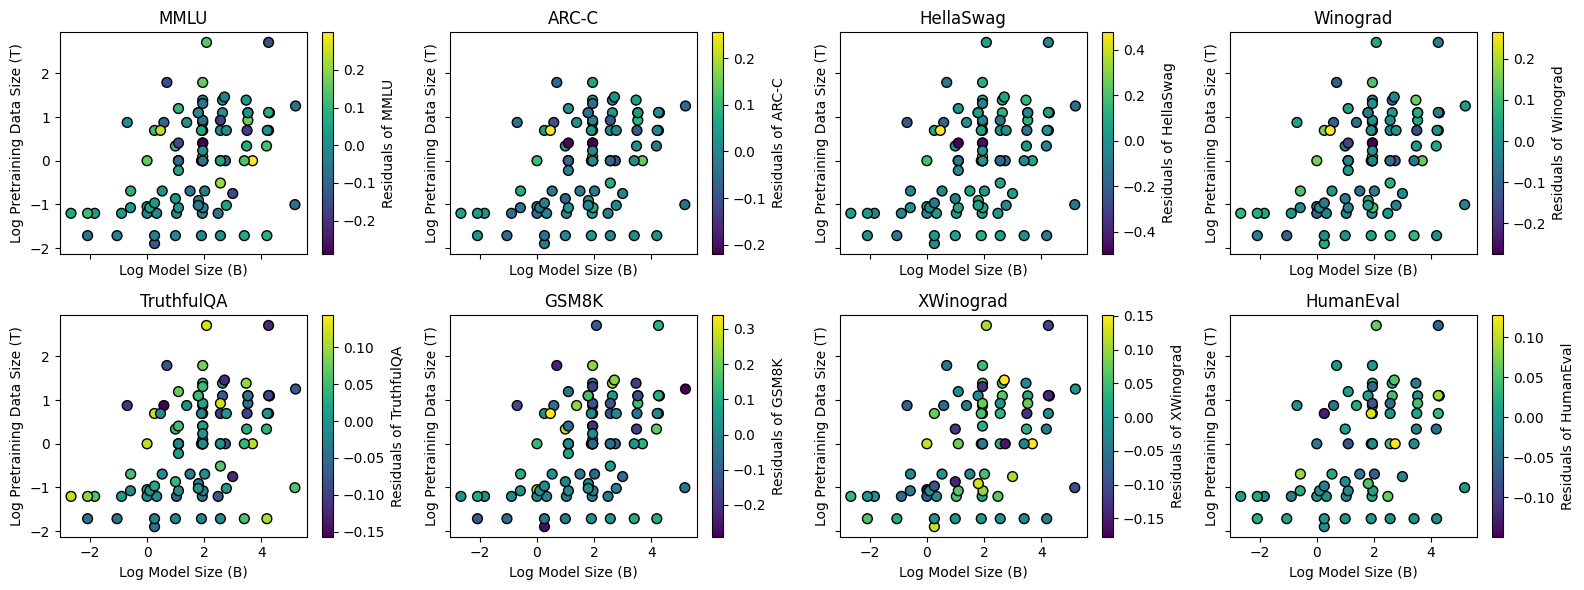

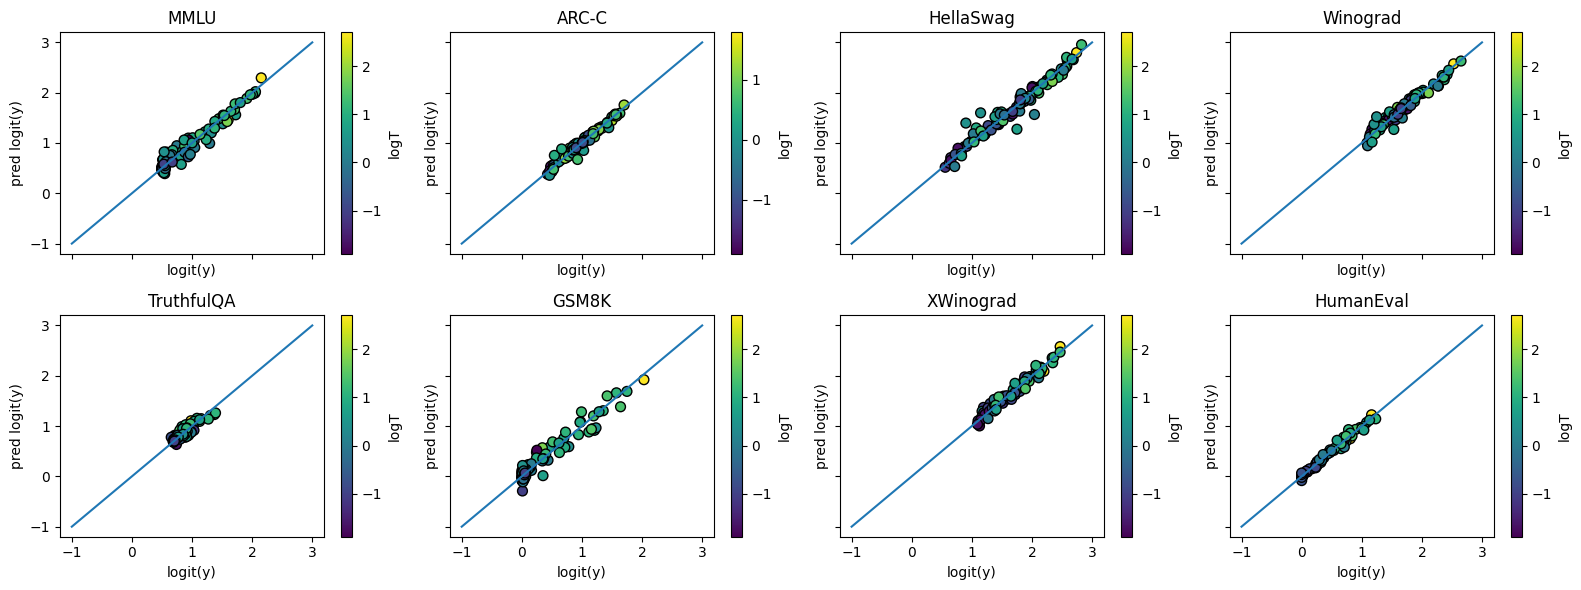

In [13]:
# Number of subplots needed
n_rows = 2
n_cols = 4

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6), sharex=True, sharey=True)

# Flatten the 2D array of axes to iterate easily
axes = axes.flatten()

for i, bench in enumerate(benchs):
    logS = np.log(data['Model Size (B)'])
    logT = np.log(data['Pretraining Data Size (T)'])
    y = logit(data[bench])  # If 'y' is already in logit form, remove the logit function
    select = (~np.isnan(logS))*(~np.isnan(logT))*(~np.isnan(y))
    logS = logS[select]
    logT = logT[select]
    y = y[select]
    D = np.array(pd.get_dummies(data['Model Family'])).astype(int)[select]
    
    # Fit linear regression model
    X = np.column_stack([logS, logT, logS*logT, D])
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    # Predict and compute residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Create the scatter plot of residuals
    scatter = axes[i].scatter(logS, logT, c=residuals, cmap='viridis', s=50, edgecolor='k')

    # Add color bar to show the scale
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('Residuals of ' + bench)

    # Add labels and title
    axes[i].set_xlabel('Log Model Size (B)')
    axes[i].set_ylabel('Log Pretraining Data Size (T)')
    axes[i].set_title(f'{bench}')

# Remove any unused subplots
for j in range(len(benchs), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6), sharex=True, sharey=True)

# Flatten the 2D array of axes to iterate easily
axes = axes.flatten()

regs=[]
for i, bench in enumerate(benchs):
    logS = np.log(data['Model Size (B)'])
    logT = np.log(data['Pretraining Data Size (T)'])
    y = logit(data[bench]) 
    select = (~np.isnan(logS))*(~np.isnan(logT))*(~np.isnan(y))
    logS = logS[select]
    logT = logT[select]
    y = y[select]
    D = np.array(pd.get_dummies(data['Model Family'])).astype(int)[select]
    
    # Fit linear regression model
    X = np.column_stack([logS, logT, logS*logT, D])
    regs.append(LinearRegression(fit_intercept=False))
    regs[-1].fit(X, y)
    
    # Predict and compute residuals
    y_pred = regs[-1].predict(X)
    residuals = y - y_pred

    # Plot residuals vs predicted y
    scatter = axes[i].scatter(y, y_pred,c=logT, cmap='viridis', s=50, edgecolor='k')
    axes[i].plot([-1,3],[-1,3])
    # Add color bar to show the scale
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('logT')
    
    # Add labels and title
    axes[i].set_xlabel('logit(y)')
    axes[i].set_ylabel('pred logit(y)')
    axes[i].set_title(f'{bench}')

# Remove any unused subplots
for j in range(len(benchs), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
[r.coef_[:3] for r in regs]

[array([ 0.13709542, -0.01562683,  0.0919949 ]),
 array([0.13819452, 0.03272519, 0.03107367]),
 array([0.23762888, 0.09726593, 0.00448425]),
 array([0.15874257, 0.00159899, 0.03940006]),
 array([ 0.01906391, -0.02642906,  0.04178952]),
 array([0.13137424, 0.12155437, 0.093863  ]),
 array([0.13871195, 0.07328094, 0.03231254]),
 array([0.09115609, 0.10927594, 0.04740007])]

In [15]:
[r.coef_[3:] for r in regs]

[array([ 2.45223718e-01,  4.69409835e-01,  2.98617311e-01,  4.85988804e-01,
         2.60844341e+11,  3.68085820e-01,  9.69460276e-01,  4.55169307e-01,
         4.87201811e-01,  8.59473383e+09,  4.49995536e-01,  8.66161248e-01,
         2.63836132e+10,  6.85044662e-01,  7.17712254e-01,  6.96299610e-01,
         4.43929260e-01,  2.10120520e+09, -1.96995478e+09,  5.24640635e-01,
         4.87275577e-01,  4.65371128e-01,  1.03992702e+00,  5.03076846e-01,
         1.01898543e+00,  9.89857729e-01, -8.65006346e+09,  3.61645385e-01,
         4.90883406e-01,  3.90839185e-01,  4.59406036e-01,  4.54482647e-01,
         1.14555322e+00,  1.13619118e+00]),
 array([ 5.78795140e-01,  6.33376960e-01,  5.01392864e-01,  7.47946486e-01,
         3.33066907e-14,  4.12469337e-01,  8.69443036e-01,  7.20000213e-01,
         7.94267757e-01, -1.13797860e-15,  6.70842779e-01,  9.22250763e-01,
         2.77555756e-17,  8.84828010e-01,  8.90227326e-01,  1.38777878e-17,
         7.80579285e-01,  4.63767479e-17,  2

In [16]:
data['Model Family']

0                    Llama-2
1                    Llama-2
2                    Llama-2
3                      Llama
4                      Llama
               ...          
102    RedPajama-INCITE-Base
103    RedPajama-INCITE-Base
104                    Amber
105                  Codegen
106                  Codegen
Name: Model Family, Length: 107, dtype: object

In [17]:
pd.get_dummies(data['Model Family'])[select]

,Amber,BLOOM,CodeLlama,Codegen,DeciLM,DeepSeek-Coder,DeepSeek-LLM,DeepSeek-MoE,Falcon,GPT-2,...,Qwen,Qwen1.5,RWKV,RedPajama-INCITE-Base,StableLM,StarCoder,StarCoder2,XGLM,Yi,Yi-200K
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
74,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
